In [194]:
import numpy as np
import matplotlib.pyplot as plt
import math

plt.rcParams['figure.figsize'] = [8, 6]
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=13)
plt.rc('legend', fontsize=13)
plt.rc('axes', labelsize=14)
plt.rc('axes', titlesize=13)

In [2]:
def PA(n=1000, m=1, fgen=lambda:1.0):
    degs = [1]
    fs = [fgen()]
    edges = [[0]]
    for i in range(n-1):
        weights = np.array(degs)*np.array(fs)
        new_edges = np.random.choice(range(i+1), m, p=weights/np.sum(weights))
        edges.append(new_edges)
        fs.append(fgen())
        degs.append(m)
        for e in new_edges: degs[e] += 1
    return degs

PA(10000, 5)

[330,
 495,
 230,
 180,
 368,
 256,
 159,
 261,
 117,
 145,
 208,
 87,
 147,
 286,
 114,
 159,
 187,
 192,
 36,
 95,
 71,
 109,
 74,
 102,
 63,
 70,
 178,
 115,
 67,
 91,
 172,
 65,
 59,
 62,
 137,
 82,
 100,
 123,
 156,
 66,
 51,
 32,
 52,
 49,
 47,
 146,
 30,
 62,
 126,
 39,
 72,
 55,
 55,
 111,
 42,
 99,
 43,
 24,
 70,
 32,
 38,
 93,
 65,
 95,
 83,
 60,
 54,
 71,
 31,
 43,
 29,
 79,
 59,
 98,
 41,
 43,
 47,
 38,
 102,
 67,
 57,
 55,
 121,
 90,
 58,
 66,
 63,
 55,
 27,
 32,
 89,
 39,
 64,
 28,
 57,
 90,
 92,
 84,
 71,
 78,
 23,
 34,
 22,
 39,
 49,
 14,
 59,
 49,
 54,
 32,
 67,
 35,
 66,
 29,
 29,
 26,
 39,
 26,
 24,
 79,
 41,
 55,
 59,
 65,
 29,
 25,
 33,
 40,
 39,
 39,
 53,
 45,
 35,
 18,
 42,
 24,
 42,
 32,
 62,
 36,
 47,
 29,
 23,
 33,
 21,
 14,
 43,
 70,
 17,
 70,
 28,
 54,
 43,
 20,
 25,
 51,
 22,
 31,
 45,
 48,
 34,
 31,
 60,
 21,
 28,
 36,
 45,
 29,
 18,
 92,
 40,
 32,
 29,
 33,
 28,
 38,
 48,
 19,
 42,
 20,
 20,
 55,
 53,
 71,
 16,
 27,
 26,
 62,
 61,
 57,
 28,
 53,
 25,
 42,

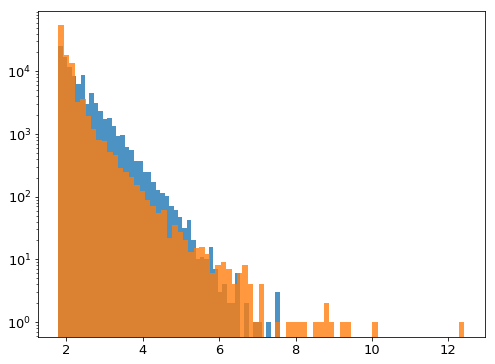

In [7]:
# plt.hist(np.log(PA(10000, 5, np.random.random)), bins=40, normed=True)
# plt.hist(np.log(PA(20000, 5, lambda:np.random.beta(1,10))), bins=40)

# pa_plain = PA(100000, 6)
# pa_fit = PA(100000, 6, lambda:np.random.beta(1,20))

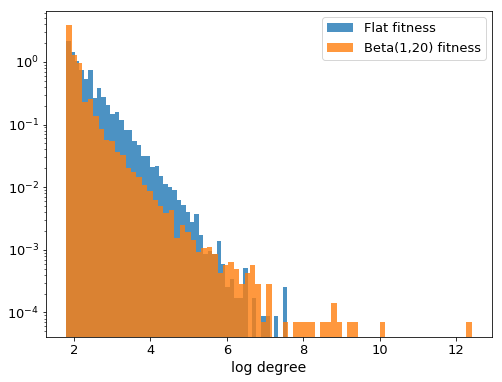

In [15]:
plt.hist(np.log(pa_plain), bins=50, alpha=0.8, normed=True)
plt.hist(np.log(pa_fit), bins=75, alpha=0.8, normed=True)
plt.yscale('log')
plt.xlabel('log degree')
plt.legend(['Flat fitness', 'Beta(1,20) fitness'])
plt.show()

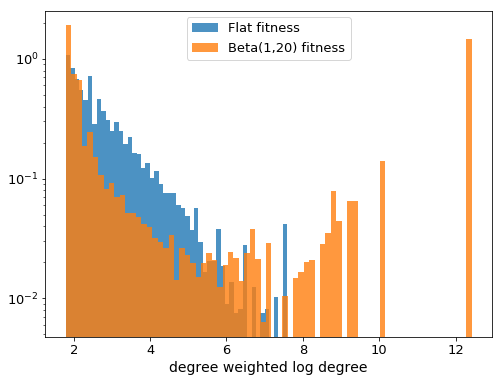

In [16]:
plt.hist(np.log(pa_plain), weights=pa_plain, bins=50, alpha=0.8, normed=True)
plt.hist(np.log(pa_fit), weights=pa_fit, bins=75, alpha=0.8, normed=True)
plt.yscale('log')
plt.xlabel('degree weighted log degree')
plt.legend(['Flat fitness', 'Beta(1,20) fitness'])
plt.show()

In [17]:
pa_plain_12 = PA(100000, 12)
pa_fit_12 = PA(100000, 12, lambda:np.random.beta(1,10))

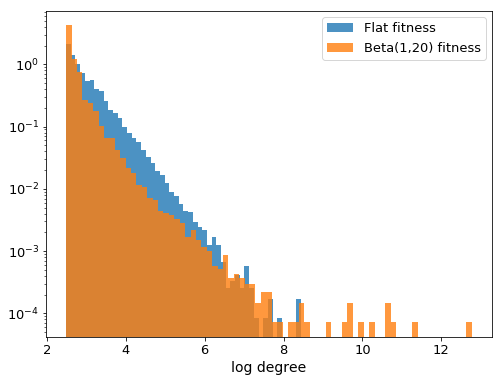

In [21]:
plt.hist(np.log(pa_plain_12), bins=50, alpha=0.8, normed=True)
plt.hist(np.log(pa_fit_12), bins=75, alpha=0.8, normed=True)
plt.yscale('log')
plt.xlabel('log degree')
plt.legend(['Flat fitness', 'Beta(1,20) fitness'])
plt.show()

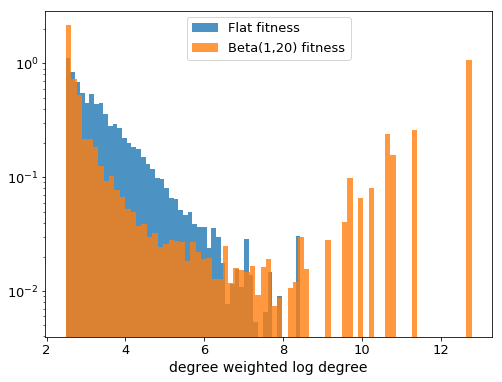

In [22]:
plt.hist(np.log(pa_plain_12), weights=pa_plain_12, bins=50, alpha=0.8, normed=True)
plt.hist(np.log(pa_fit_12), weights=pa_fit_12, bins=75, alpha=0.8, normed=True)
plt.yscale('log')
plt.xlabel('degree weighted log degree')
plt.legend(['Flat fitness', 'Beta(1,20) fitness'])
plt.show()

In [174]:
_a = np.array([0])
np.add.at(_a, [0,0], [1,2])
_a

array([3])

In [205]:
#!/usr/bin/env python

import numpy as np

# wrappers for generators
def Beta(a, b): return lambda: np.random.beta(a, b)
def Exp(s): return lambda: np.random.exponential(s)
def Poi(a): return lambda: np.random.poisson(a)
def Unif(a, b): return lambda: np.random.uniform(a, b)
def Choice(arr, p=None): return lambda: np.random.choice(arr, p=p)

class PAN(object):
    def __init__(self, m=1, fgen=lambda:1.0, capacity=1000):
        '''Preferential attachment network
        m: degree for each new node
        fgen: fitness distribution
        capacity(optional): hint for size
        '''
        self.capacity = capacity
        self.m = m
        self.degs = np.array([m], dtype='int32')        # degrees
        self.fgen = fgen
        self.fs = np.array([fgen()], dtype='float32')   # fitnesses
        # self.edges = [[0] * m]                          # edges w/ multiplicity TODO: don't think this is necessary, hard to optimize for performance reason
        self.size = 1                                   # n nodes
        self.tot_edges = m                              # n edges
        self.weights = self.fs * self.degs
        self.tot_weights = self.weights[0]
        self._resize(capacity)

    def _resize(self, size):
        '''Pad arrays with zeros to avoid repetitive appending'''
        self.degs.resize(size)
        self.fs.resize(size)
        self.weights.resize(size)
        self.capacity = size

    def add_node(self):
        size = self.size
        m = self.m
        if size == self.capacity:
            self._resize(self.capacity * 2)
#         weights = np.multiply(self.fs[:size], self.degs[:size])
        endpoints = np.random.choice(range(size), m, replace=True, p=self.weights[:size]/self.tot_weights)
        # self.edges.append(endpoints)    # new edges
        new_fit = self.fgen()     # new fitness
        self.fs[size] = new_fit
        self.degs[size] = m             # deg for new node
        np.add.at(self.degs, endpoints, 1)       # update endpoints TODO: this isn't strictly correct
        self.weights[size] = m * new_fit
        endpoints_fit = self.fs[endpoints]
        np.add.at(self.weights, endpoints, endpoints_fit)
        self.tot_weights += m * new_fit + math.fsum(endpoints_fit)
        self.size += 1
        self.tot_edges += m

    def grow_to_size(self, size):
        if size > self.capacity: self._resize(size)
        while (self.size < size):
            self.add_node()

if __name__ == '__main__':
    pan = PAN()
    pan.grow_to_size(1000)
    print(pan.degs)


[35 24  4 53 28  1  6  5 10 25 17  2  2 20  3  2  4 14  7 14 16 22  4 13  2
  8  8  2  5 21  8  3  3 12  3  7  2  1  2  9  1  1  2  3  1  4 14  1  4  2
  1  7  3  1  2  5  1  4  4  2  2  2  2  3  2  2  1  1  7  2  7  4  8  9  3
  2  1  1  2 12  3  1  1  2  2  1  2  1  1  3  2  3  2  4  1  1  1  2  6  1
  6  1  6  2  1  5  1  4  1  2  1  3  3 10  2  4  2  4  3  2  4  6  3  3  1
  4  1  1  8  1  3  2  4  4  2  1  2  2  2  1  3  3  1  1 14  2  1  4  1  8
  3  1  4  1  1  1  1  6  1  6  3  6  1  1  5  2  1  1  1  1  1  3  1  3  2
  1  2  2  3  2  2  1  2  1  1  7  3  7  1  1  7  2  2  3  1  2  2  2  1  2
  2  1  1  1  1  1  3  2  4  2  2  1  1  1  1  2  1  1  1  2  3  4  4  1  1
  5  2  2  1  1  2  2  1  2  1  1  1  7  2  3  3  3  3  2  2  2  6  3  2  1
  1  4  2  1  1  1  1  1  3  2  3  2  1  1  2  3  1  3  2  2  4  2  2  1  2
  2  4  2  2  4  1  1  2  1  4  1  1  2  5  3  4  1  4  1  1  3  4  1  2  1
  2  4  1  2  6  3  2  2  1  2  1  1  1  2  3  1  4  4  1  1  1  2  1  1  1
  3  1  1  1

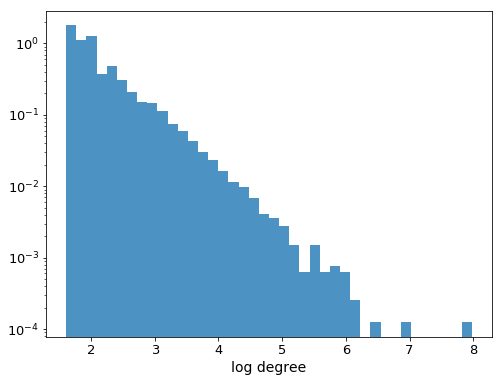

CPU times: user 1min 8s, sys: 654 ms, total: 1min 9s
Wall time: 1min 10s


In [178]:
%%time
pan = PAN(m=5)
pan.grow_to_size(50000)
plt.hist(np.log(pan.degs), bins=40, alpha=0.8, normed=True)
plt.yscale('log')
plt.xlabel('log degree')
# plt.legend(['Flat fitness', 'Beta(1,20) fitness'])
plt.show()

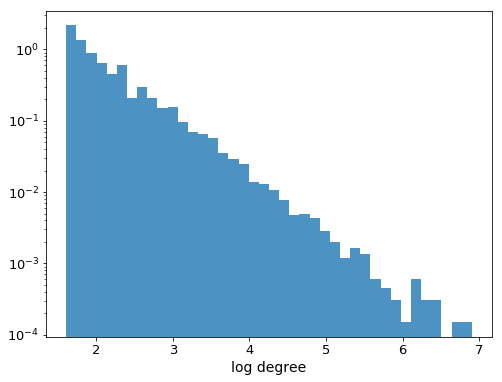

CPU times: user 1min 24s, sys: 1.41 s, total: 1min 25s
Wall time: 1min 34s


In [53]:
%%time
pan = PAN(m=5)
pan.grow_to_size(50000)
plt.hist(np.log(pan.degs), bins=40, alpha=0.8, normed=True)
plt.yscale('log')
plt.xlabel('log degree')
# plt.legend(['Flat fitness', 'Beta(1,20) fitness'])
plt.show()

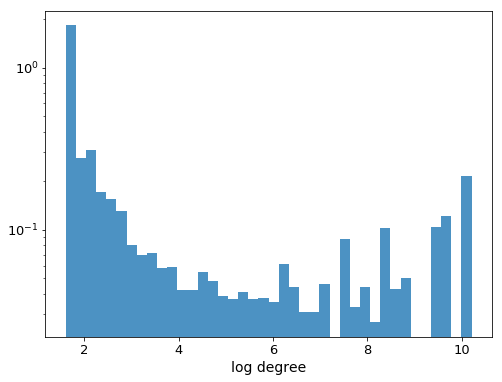

CPU times: user 34.4 s, sys: 218 ms, total: 34.6 s
Wall time: 34.9 s


In [179]:
%%time
# pan1 = PAN(m=5, fgen=Beta(1,20))
pan1.grow_to_size(60000)
plt.hist(np.log(pan1.degs), weights=pan1.degs, bins=40, alpha=0.8, normed=True)
plt.yscale('log')
plt.xlabel('log degree')
# plt.legend(['Flat fitness', 'Beta(1,20) fitness'])
plt.show()

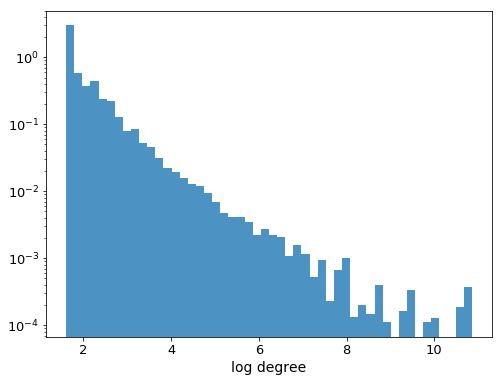

CPU times: user 4min 21s, sys: 4.55 s, total: 4min 25s
Wall time: 4min 26s


In [73]:
%%time
# pan_beta = PAN(m=5, fgen=lambda:np.random.beta(1,10))
pan_beta.grow_to_size(160000)
plt.hist(np.log(pan_beta.degs), weights=pan_beta.fs, bins=60, alpha=0.8, normed=True)
plt.yscale('log')
plt.xlabel('log degree')
# plt.legend(['Flat fitness', 'Beta(1,20) fitness'])
plt.show()

In [80]:
pan_beta_50 = PAN(m=10, fgen=Beta(1,50))

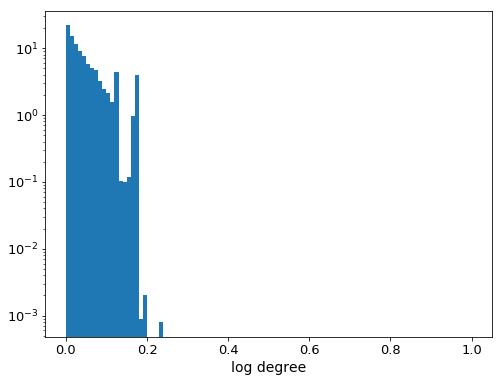

CPU times: user 1min 18s, sys: 1.2 s, total: 1min 19s
Wall time: 1min 19s


In [108]:
%%time
pan_beta_50.grow_to_size(130000)
plt.hist(pan_beta_50.fs, weights=pan_beta_50.degs, bins=np.linspace(0,1,101), normed=True)
plt.yscale('log')
plt.xlabel('log degree')
# plt.legend(['Flat fitness', 'Beta(1,20) fitness'])
plt.show()

In [196]:
pan_beta_2_1p = PAN(m=5, fgen=Beta(1,10))
pan_beta_2_1p.grow_to_size(1000)
pan_beta_2_1p.tot_weights, pan_beta_2_1p.weights[:1000].sum()

(1770.4794616754261, 1770.4794616754275)

In [222]:
%%time
pan_beta_2_1p = PAN(m=5, fgen=Beta(1,10))
for sz in range(100, 40001, 50):
    # plt.hist(pan_beta_10p.fs, weights=pan_beta_10p.degs, bins=np.linspace(0,1,101), alpha=0.6, normed=True)
    pan_beta_2_1p.grow_to_size(sz)
    plt.hist(pan_beta_2_1p.fs, weight=pan_beta_2_1p.degs, bins=60, alpha=0.9, normed=True)
    plt.yscale('log')
#     plt.xscale('log')
#     plt.xlabel('fitness')
    plt.xlabel('log degree')
    # plt.legend(['Flat fitness', 'Beta(1,20) fitness'])
    plt.show()

AttributeError: Unknown property weight

In [99]:
pan_beta_10 = PAN(m=10, fgen=Beta(1,10))

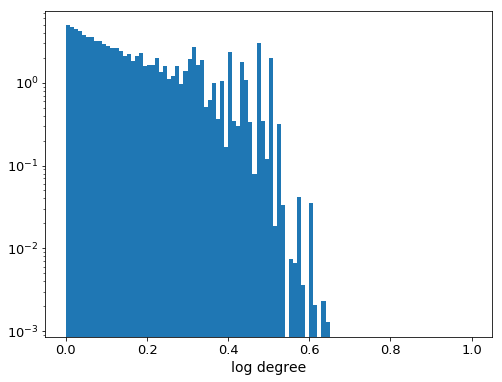

CPU times: user 34.9 s, sys: 152 ms, total: 35.1 s
Wall time: 35.2 s


In [101]:
%%time
pan_beta_10.grow_to_size(40000)
plt.hist(pan_beta_10.fs, weights=pan_beta_10.degs, bins=np.linspace(0,1,101), normed=True)
plt.yscale('log')
plt.xlabel('log degree')
# plt.legend(['Flat fitness', 'Beta(1,20) fitness'])
plt.show()

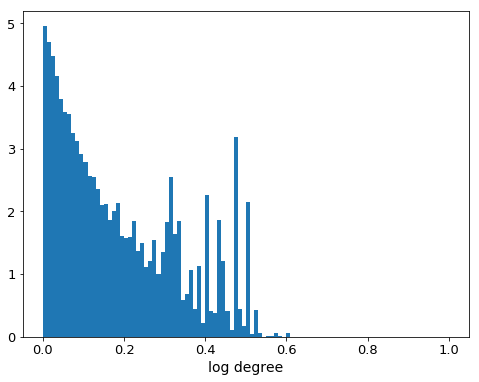

CPU times: user 320 ms, sys: 10.5 ms, total: 330 ms
Wall time: 330 ms


In [115]:
%%time
pan_beta_10.grow_to_size(80000)
plt.hist(pan_beta_10.fs, weights=pan_beta_10.degs, bins=np.linspace(0,1,101), normed=True)
# plt.yscale('log')
plt.xlabel('log degree')
# plt.legend(['Flat fitness', 'Beta(1,20) fitness'])
plt.show()

In [90]:
pan_beta_5_1 = PAN(m=10, fgen=Beta(5,1))

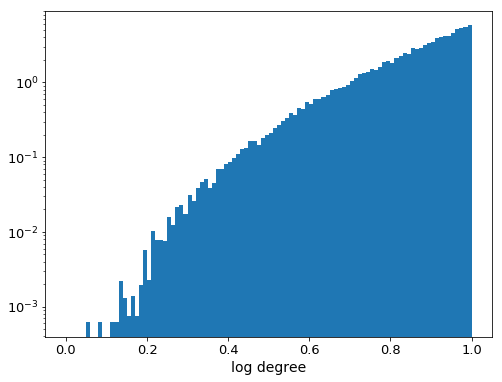

CPU times: user 602 ms, sys: 13.2 ms, total: 615 ms
Wall time: 624 ms


In [98]:
%%time
pan_beta_5_1.grow_to_size(80000)
plt.hist(pan_beta_5_1.fs, weights=pan_beta_5_1.degs, bins=np.linspace(0,1,101), normed=True)
plt.yscale('log')
plt.xlabel('log degree')
# plt.legend(['Flat fitness', 'Beta(1,20) fitness'])
plt.show()

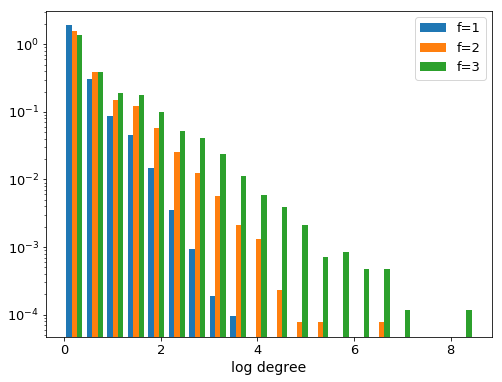

CPU times: user 795 ms, sys: 31.8 ms, total: 827 ms
Wall time: 867 ms


In [221]:
%%time
fitnesses = [1,2,3]
# pan_discrete = PAN(fgen=Choice([1,2,3], p=[0.5, 0.3, 0.2]))
pan_discrete.grow_to_size(100000)
plt.hist([np.log(pan_discrete.degs[pan_discrete.fs==f]) for f in fitnesses], bins=20, normed=True, label=['f='+str(f) for f in fitnesses])
# plt.hist(np.log(pan_discrete.degs[pan_discrete.fs==2]), bins=50, normed=True)
# plt.hist(np.log(pan_discrete.degs[pan_discrete.fs==3]), bins=50, normed=True)
plt.yscale('log')
plt.xlabel('log degree')
plt.legend()
# plt.legend(['Flat fitness', 'Beta(1,20) fitness'])
plt.show()